# Averaged Height profiles from AFM full NPCs




----


**This script leads to graphical representation of radially averaged profiles, but the data were obtained from a previous Matlab program.**

This is a Python script to plot mean height profiles with standard deviations from individual NPCs.
3 NPCs have been qualitatively picked to illustrate nuclear basket variability.





In [5]:
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img


In [7]:
# import height profiles

url1="https://raw.githubusercontent.com/ChDoucet/AFM-analysis/master/NPC_Profile-2.txt"
url2="https://raw.githubusercontent.com/ChDoucet/AFM-analysis/master/NPC_std-2.txt"
NPC_Profile=pd.read_csv(url1)
NPC_std=pd.read_csv(url2)
#print(NPC_std.head())
#print(NPC_Profile.head())



Examples qualitatively selected for 3 classes of NPCs (within 2um scans):
- empty channel: #1, **#84**, #79, #78, #76, #75, #45, #31
- prominent basket: **#83**, #65, #57, #54, #32, #23, #21, #17, #16
- lower basket: **#82**, #77, #71, #70, #59, #28


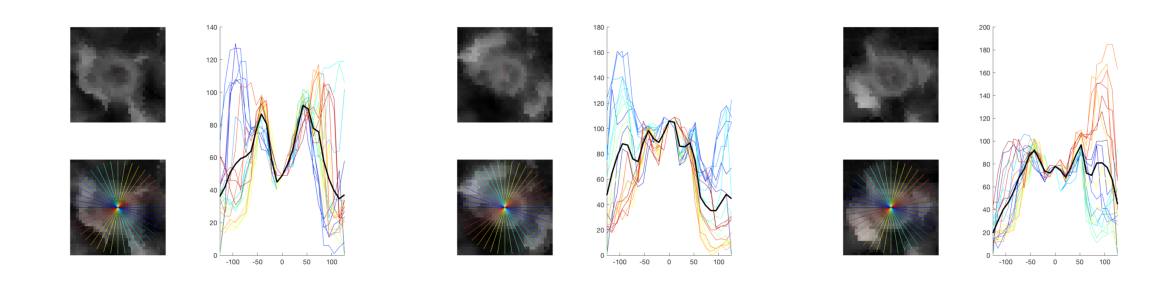

In [8]:
# show selected profiles from Matlab




url84="https://raw.githubusercontent.com/ChDoucet/AFM-analysis/master/2um_84.tif" 
url83="https://raw.githubusercontent.com/ChDoucet/AFM-analysis/master/2um_83.tif"
url82="https://raw.githubusercontent.com/ChDoucet/AFM-analysis/master/2um_82.tif"
image84 = img.imread(url84, format='tiff')
image83 = img.imread(url83, format='tiff')
image82 = img.imread(url82, format='tiff')

fig, (ax0, ax1, ax2) = plt.subplots(constrained_layout=True, nrows=1, ncols=3, sharex=True, figsize=(16,6))
ax0.imshow(image84) 
ax1.imshow(image83) 
ax2.imshow(image82)

ax0.axis('off')
ax1.axis('off')
ax2.axis('off')

plt.show()

In [9]:
# select appropriate height profiles

x= np.linspace(-126, 126, 25) 

y1= NPC_Profile.iloc[83, slice(0,25)].values  # corresponds to crop 84
y1err= NPC_std.iloc[83,slice(0,25)].values

y2= NPC_Profile.iloc[82, slice(0,25)].values  # corresponds to crop 83
y2err= NPC_std.iloc[82,slice(0,25)].values

y3= NPC_Profile.iloc[81, slice(0,25)].values  # corresponds to crop 82
y3err= NPC_std.iloc[81,slice(0,25)].values

#print(x)


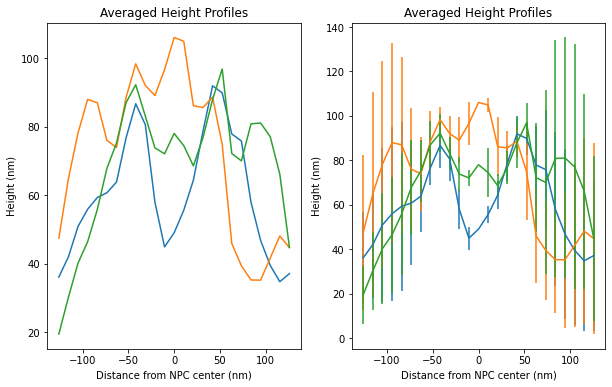

In [10]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10, 6))

ax0.set_title('Averaged Height Profiles')
ax0.plot(x, y1)
ax0.plot(x, y2)
ax0.plot(x, y3)

ax0.set_xlabel('Distance from NPC center (nm)')
ax0.set_ylabel('Height (nm)')


ax1.set_title('Averaged Height Profiles')
ax1.errorbar(x, y1, yerr=y1err)
ax1.errorbar(x, y2, yerr=y2err)
ax1.errorbar(x, y3, yerr=y3err)

ax1.set_xlabel('Distance from NPC center (nm)')
ax1.set_ylabel('Height (nm)')

plt.show()

Here I would like to make a graph with shaded areas for error bars. I think it would be easier to read. 



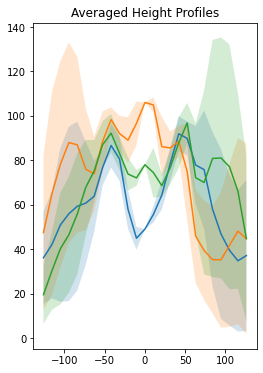

In [11]:
fig, ax0 = plt.subplots(figsize=(4, 6))

ax0.set_title('Averaged Height Profiles')
ax0.plot(x, y1)
ax0.fill_between(x, y1-y1err, y1+y1err, alpha=0.2)

ax0.plot(x, y2)
ax0.fill_between(x, y2 - y2err, y2 + y2err, alpha=0.2)

ax0.plot(x, y3)
ax0.fill_between(x, y3 - y3err, y3 + y3err, alpha=0.2)





**Important note:** it is important to extract the tables as values !! Otherwise, building plots works fine but it is not possible to make operations on the values (the result is NaN).

Now, let's restrict the profile to the actual pore (removing the extra height that lies outside and adds variability).

In [12]:
x= np.linspace(-73.5, 73.5, 15) 

y1= NPC_Profile.iloc[83, slice(5,20)].values  # corresponds to crop 84
y1err= NPC_std.iloc[83,slice(5,20)].values

y2= NPC_Profile.iloc[82, slice(5,20)].values  # corresponds to crop 83
y2err= NPC_std.iloc[82,slice(5,20)].values

y3= NPC_Profile.iloc[81, slice(5,20)].values  # corresponds to crop 82
y3err= NPC_std.iloc[81,slice(5,20)].values


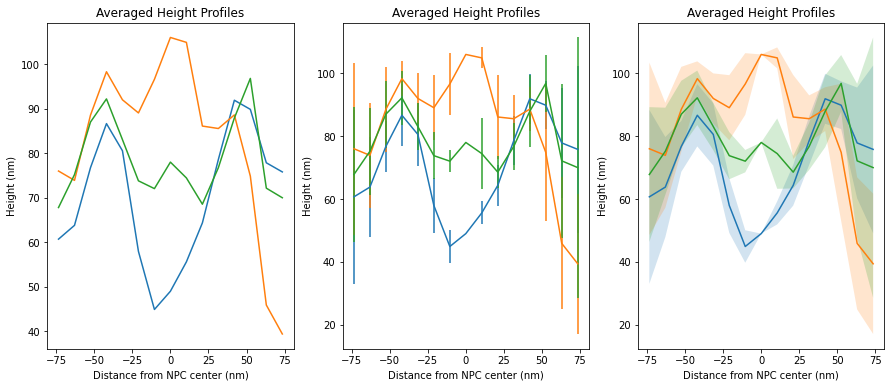

In [13]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3, sharex=True, figsize=(15, 6))

ax0.set_title('Averaged Height Profiles')
ax0.plot(x, y1)
ax0.plot(x, y2)
ax0.plot(x, y3)

ax0.set_xlabel('Distance from NPC center (nm)')
ax0.set_ylabel('Height (nm)')


ax1.set_title('Averaged Height Profiles')
ax1.errorbar(x, y1, yerr=y1err)
ax1.errorbar(x, y2, yerr=y2err)
ax1.errorbar(x, y3, yerr=y3err)

ax1.set_xlabel('Distance from NPC center (nm)')
ax1.set_ylabel('Height (nm)')

ax2.set_title('Averaged Height Profiles')
ax2.plot(x, y1)
ax2.fill_between(x, y1-y1err, y1+y1err, alpha=0.2)

ax2.plot(x, y2)
ax2.fill_between(x, y2 - y2err, y2 + y2err, alpha=0.2)

ax2.plot(x, y3)
ax2.fill_between(x, y3 - y3err, y3 + y3err, alpha=0.2)

ax2.set_xlabel('Distance from NPC center (nm)')
ax2.set_ylabel('Height (nm)')

plt.show()


------

Let's try to make a complete figure now (with AFM images, color scale in nm and profiles on the right).


In [14]:
import matplotlib.gridspec as gridspec
import mpl_toolkits.axisartist as AA


In [15]:
# importing the pore images (AFM)

pore84 = img.imread('https://raw.githubusercontent.com/ChDoucet/AFM-analysis/master/2um_NPC_84.tif', format='tiff')
pore83 = img.imread('https://raw.githubusercontent.com/ChDoucet/AFM-analysis/master/2um_NPC_83.tif', format='tiff')
pore82 = img.imread('https://raw.githubusercontent.com/ChDoucet/AFM-analysis/master/2um_NPC_82.tif', format='tiff')



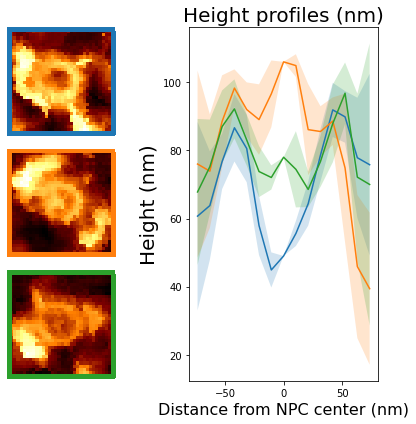

In [21]:
# creating the figure layout

fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(3, 2)
f_ax1 = fig.add_subplot(gs[0, 0])
#f_ax1.set_title('class #1')
f_ax2 = fig.add_subplot(gs[1, 0])
#f_ax2.set_title('class #2')
f_ax3 = fig.add_subplot(gs[2, 0])
#f_ax3.set_title('class #3]')
f_ax4 = fig.add_subplot(gs[0:, -1])
f_ax4.set_title('Height profiles (nm)', fontsize=20)

# filling the layout

f_ax1.imshow(pore84, cmap='afmhot') 
f_ax2.imshow(pore83, cmap='afmhot') 
f_ax3.imshow(pore82, cmap='afmhot')


f_ax1.axis('off')
f_ax1.axhline(y=-0, xmin=0, xmax=0.95, color='tab:blue', linewidth=5)
f_ax1.axhline(y=33, xmin=0, xmax=0.95, color='tab:blue', linewidth=5)
f_ax1.axvline(x=0, ymin=0.05, ymax=0.95, color='tab:blue', linewidth=5)
f_ax1.axvline(x=33, ymin=0.05, ymax=0.95, color='tab:blue', linewidth=5)

f_ax2.axis('off')
f_ax2.axhline(y=0, xmin=0, xmax=0.95, color='tab:orange', linewidth=5)
f_ax2.axhline(y=33, xmin=0, xmax=0.95, color='tab:orange', linewidth=5)
f_ax2.axvline(x=0, ymin=0.05, ymax=0.95, color='tab:orange', linewidth=5)
f_ax2.axvline(x=33, ymin=0.05, ymax=0.95, color='tab:orange', linewidth=5)

f_ax3.axis('off')
f_ax3.axhline(y=0, xmin=0, xmax=0.95, color='tab:green', linewidth=5)
f_ax3.axhline(y=33, xmin=0, xmax=0.95, color='tab:green', linewidth=5)
f_ax3.axvline(x=0, ymin=0.05, ymax=0.95, color='tab:green', linewidth=5)
f_ax3.axvline(x=33, ymin=0.05, ymax=0.95, color='tab:green', linewidth=5)


# trying to frame the images with appropriate colors

f_ax4.plot(x, y1)
f_ax4.fill_between(x, y1-y1err, y1+y1err, alpha=0.2)

f_ax4.plot(x, y2)
f_ax4.fill_between(x, y2 - y2err, y2 + y2err, alpha=0.2)

f_ax4.plot(x, y3)
f_ax4.fill_between(x, y3 - y3err, y3 + y3err, alpha=0.2)

f_ax4.set_xlabel('Distance from NPC center (nm)', fontsize=16)
f_ax4.set_ylabel('Height (nm)', fontsize=20)

plt.tight_layout()


plt.savefig('fullNPC_profiles.tif', dpi=600)
plt.savefig('fullNPC_profiles.jpg', dpi=600)
plt.show()

**NB: Default colors in matplotlib are:**


{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'} which are the Tableau Colors from the 'tab10' categorical palette (which is the default color cycle);
